In [ ]:
#解析結果の可視化

In [1]:
import pandas as pd

In [16]:
df=pd.read_csv("jaster.csv")
df[:3]

,run,主要db,メモ,model by,lr,N,jcommon学習数,AVG_jglue,Jcommon,AVG_jaster,...,repetition_penalty,temperature,top_k,top_p,jgule_AVG,jgule_jcommonsenseqa_exact_match,jgule_jnli_exact_match,jgule_jsquad_char_f1,jgule_jsts_pearson,jgule_jsts_spearman
0,20240327_223304llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,100.0,4.495518,0.2527,0.26,0.2669,...,"1,1","0.1,0.1","0,0","1,1",0.2527,0.26,0.18,0.8013,0.0072,0.0149
1,20240327_232006llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,1000.0,44.955185,0.5726,0.26,0.3768,...,"1,1","0.1,0.1","0,0","1,1",0.5726,0.26,0.61,0.8940,0.5508,0.5483
2,20240328_083321llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,2500.0,112.387961,0.6814,0.25,0.4111,...,"1,1","0.1,0.1","0,0","1,1",0.6814,0.25,0.84,0.9010,0.6930,0.7229


In [13]:
jaster_all=178956

In [3]:
import json
import glob
import random
jaster_data_dict={}
path_list=glob.glob("../4_eval/llm-leaderboard/artifacts/jaster:v3/jaster/1.1.0/evaluation/train/*.json")

for path in path_list:
    jaster_data_list=[]
    name=path.split("/")[-1].split(".")[0]
    with open(path,"r") as f:
        records=json.load(f)
    instruction=records["instruction"]  
    for record in records["samples"]:
        d={
            "text":instruction+"\n"+record["input"],
            "output":record["output"]
        }
        jaster_data_list.append(d)

    jaster_data_dict[name]=jaster_data_list

In [7]:
data_keys=list(jaster_data_dict.keys())

n_record_dict={}
for key in data_keys:
    n_record_dict[key]=len(jaster_data_dict[key])
n_record_dict

{'chabsa': 2572,
 'wiki_coreference': 1515,
 'niilc': 715,
 'jemhopqa': 953,
 'wiki_reading': 1517,
 'jsick': 4500,
 'jsquad': 56573,
 'mawps': 16,
 'jsts': 11205,
 'wiki_ner': 881,
 'jnli': 18065,
 'wiki_dependency': 1517,
 'jsem': 12667,
 'janli': 12312,
 'jamp': 8955,
 'jcommonsenseqa': 8045,
 'wiki_pas': 1514}

In [33]:
task_to_column={
    "chabsa":"chabsa_set_f1",
    "wiki_coreference":"wiki_coreference_set_f1",
    "wiki_reading":"wiki_reading_char_f1",
    "wiki_dependency":"wiki_dependency_set_f1",
    "niilc":"niilc_char_f1",
    "jemhopqa":"jemhopqa_char_f1",
    "jsquad":"jsquad_char_f1",
    "wiki_ner":"wiki_ner_set_f1",
    "wiki_pas":"wiki_pas_set_f1",

    #exact
    "jsick":"jsick_exact_match",
    "mawps":"mawps_exact_match",
    "jnli":"jnli_exact_match",
    "jsem":"jsem_exact_match",
    "janli":"janli_exact_match",
    "jamp":"jamp_exact_match",
    "jcommonsenseqa":"jcommonsenseqa_exact_match",

    #pearson
    "jsts":"jgule_jsts_pearson",
}



In [34]:
df=df[:8]
df

,run,主要db,メモ,model by,lr,N,jcommon学習数,AVG_jglue,Jcommon,AVG_jaster,...,temperature,top_k,top_p,jgule_AVG,jgule_jcommonsenseqa_exact_match,jgule_jnli_exact_match,jgule_jsquad_char_f1,jgule_jsts_pearson,jgule_jsts_spearman,Number of training data
0,20240327_223304llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,100.0,4.495518,0.2527,0.26,0.2669,...,"0.1,0.1","0,0","1,1",0.2527,0.26,0.18,0.8013,0.0072,0.0149,31.612799
1,20240327_232006llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,1000.0,44.955185,0.5726,0.26,0.3768,...,"0.1,0.1","0,0","1,1",0.5726,0.26,0.61,0.8940,0.5508,0.5483,316.127987
2,20240328_083321llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,2500.0,112.387961,0.6814,0.25,0.4111,...,"0.1,0.1","0,0","1,1",0.6814,0.25,0.84,0.9010,0.6930,0.7229,790.319967
3,20240328_104529llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,NaN,hatakeyama,0.00001,5000.0,224.775923,0.7244,0.30,0.4408,...,"0.1,0.1","0,0","1,1",0.7244,0.30,0.83,0.8917,0.8069,0.7934,1580.639934
4,20240329_021611llm-jp-llm-jp-13b-v1-0_inst_jas...,jaster,3・29ベスト,hatakeyama,0.00001,10000.0,449.551845,0.8288,0.61,0.5082,...,"0.1,0.1","0,0","1,1",0.8288,0.61,0.89,0.8940,0.8846,0.8655,3161.279868
5,NaN,jaster,NaN,hatakeyama,0.00001,20000.0,899.103690,0.8653,0.77,0.5342,...,"0.1,0.1","0,0","1,1",0.8653,0.77,0.88,0.8902,0.8959,0.8905,6322.559735
6,NaN,jaster,NaN,hatakeyama,0.00001,30000.0,1348.655535,0.8583,0.81,0.5510,...,"0.1,0.1","0,0","1,1",0.8583,0.81,0.85,0.8931,0.8797,0.8587,9483.839603
7,NaN,jaster,NaN,hatakeyama,0.00001,50000.0,2247.759226,0.8681,0.81,0.5527,...,"0.1,0.1","0,0","1,1",0.8681,0.81,0.86,0.8931,0.8885,0.8887,15806.399338


In [35]:
import matplotlib.pyplot as plt
for key in data_keys:
    column=task_to_column[key]
    n_record=n_record_dict[key]
    df["Number of training data"]=df["N"]*n_record/jaster_all
    df[column]

    continue
    plt.figure(figsize=(5,5))
    plt.plot(df["Number of training data"],df[column],label=key)
    plt.xlabel("Number of training data")
    plt.ylabel(column)
    plt.xscale("log")
    break


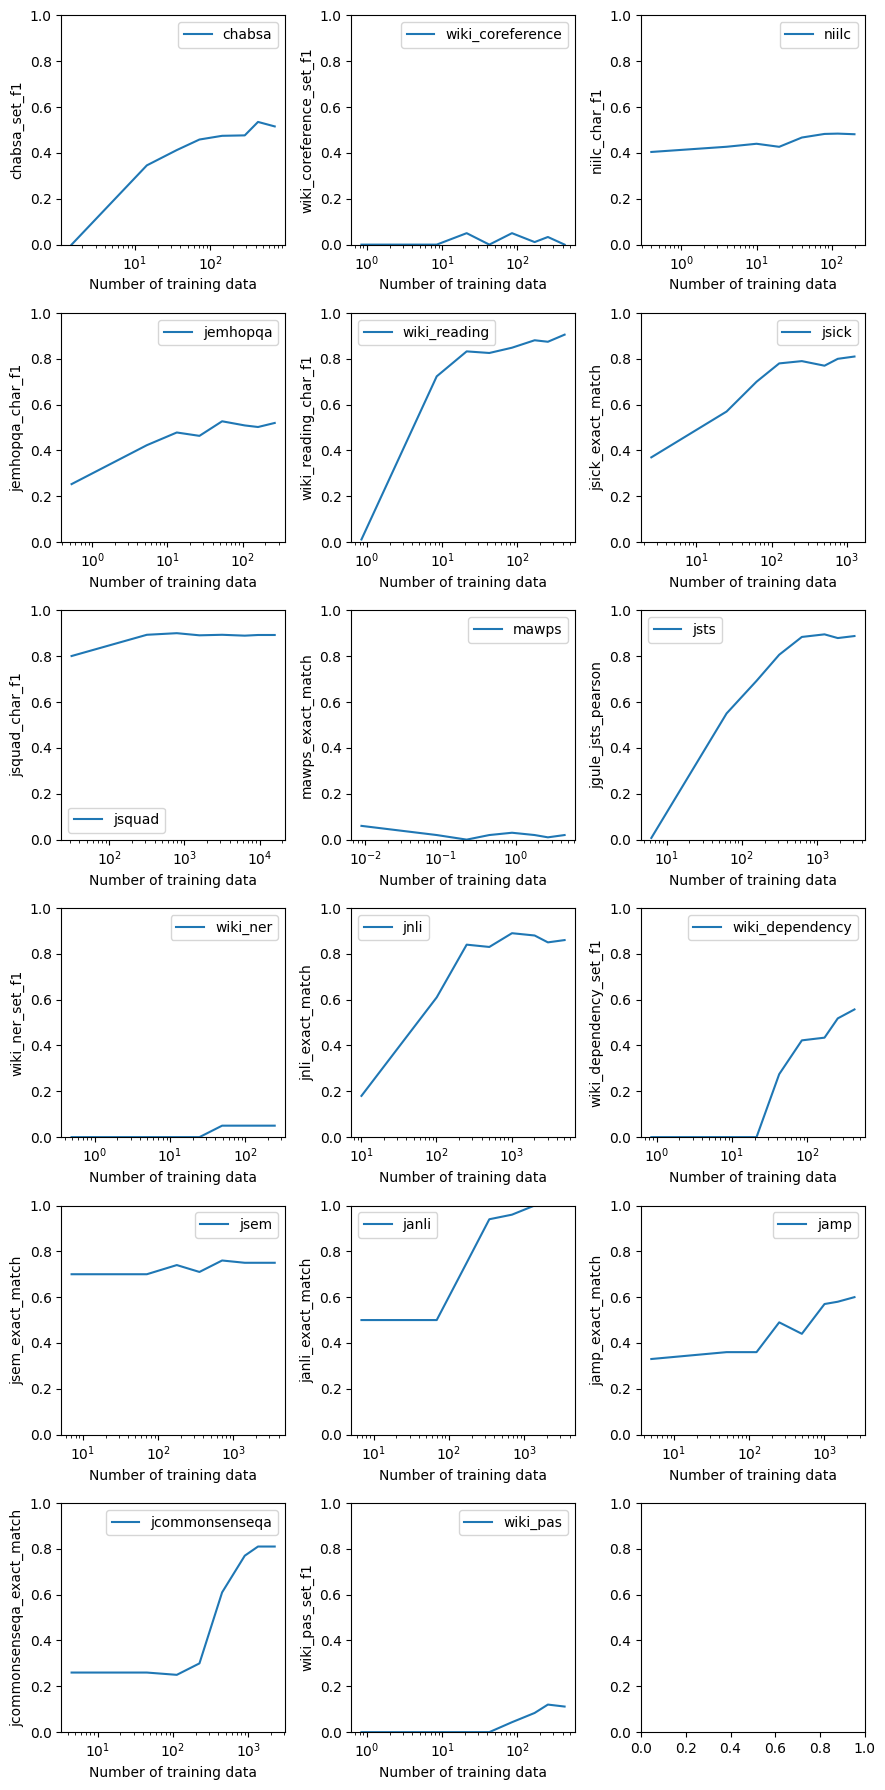

In [40]:
n_columns=3
# Calculate the number of rows needed based on the number of keys and desired columns
num_keys = len(data_keys)
num_rows = (num_keys + n_columns-1) // n_columns  # Round up division to determine the number of rows

# Iterate over data keys and plot each key's data in a subplot
fig, axs = plt.subplots(num_rows, n_columns, figsize=(9, num_rows * n_columns))

for i, key in enumerate(data_keys):
    column = task_to_column[key]
    n_record = n_record_dict[key]
    df["Number of training data"] = df["N"] * n_record / jaster_all

    # Calculate subplot index
    row_index = i // n_columns
    col_index = i % n_columns

    # If there's only one row, axs is 1-dimensional, so handle accordingly
    if num_rows == 1:
        ax = axs[col_index]
    else:
        ax = axs[row_index, col_index]

    ax.plot(df["Number of training data"], df[column], label=key)
    ax.set_xlabel("Number of training data")
    ax.set_ylabel(column)
    ax.set_xscale("log")
    #yは0-1
    ax.set_ylim(0, 1)
    ax.legend()

plt.tight_layout()
plt.show()